In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# 往后预测多少天
PEROIDS = 7

Importing plotly failed. Interactive plots will not work.


In [123]:
def read_csv(tableName,columnName):
    df = pd.read_csv(tableName)
    df = df.rename(columns={'WBL_AUD_DT':'ds',columnName:'y'})
    df = df[['ds','y']]
    df_train = df[0:len(df)-PEROIDS]
    df_test = df[len(df)-PEROIDS:len(df)]
    return df_test,df_train,len(df)
df_test, df_train,length = read_csv('Yingkou_qinzhou_after_add.csv','AMT')
harbor_pair = 'Yingkou_Qinzhou'
time_series = 'AMT'
pic_name = harbor_pair +'_' + time_series + '.png'




In [124]:
predictor = Prophet()
predictor.fit(df_train)
future = predictor.make_future_dataframe(periods = PEROIDS)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [125]:
forecast = predictor.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
226,2020-01-09,4614.030690,4229.160966,5016.559558
227,2020-01-10,4602.378958,4214.654988,5005.345122
228,2020-01-11,4607.746906,4214.570793,4980.753140
229,2020-01-12,4618.984226,4242.154852,5004.761591
230,2020-01-13,4677.647750,4284.675489,5049.488784


In [126]:
yreal = df_test[['y']].values

yhat = forecast[['yhat']]
yhat = yhat[length - PEROIDS:length].values

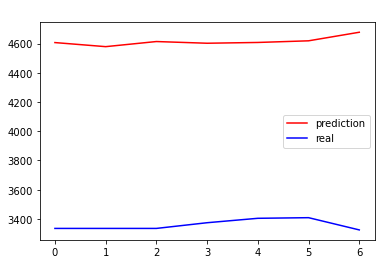

In [127]:
plt.title(' ')
plt.plot(yhat, 'r', label='prediction')
plt.plot(yreal, 'b', label='real')
plt.legend(loc='best')
plt.savefig(pic_name)
plt.show()


In [128]:
def metrics(test,predict,harbor_pair,time_series):
    # print( 'MSE均方误差,越小越好')
    print('港口对：', harbor_pair)
    print('预测变量： ', time_series)
    mse = mean_squared_error(test, predict)
    print("MSE=", mse)

    # print( 'MAE数值越小越好，可以通过对比判断好坏')
    mae = mean_absolute_error(test, predict)
    print("MAE=", mae)

    # print( 'R平方值，越接近1越好')
    r2 = r2_score(test, predict)
    print("R_square=", r2)
    
    accu_all = 0
    for i in range(len(predict)):
        if int(test[i]) == 0:
            continue
        accu = abs(test[i]-predict[i])/test[i]
        accu_all += accu
    accu_avg = accu_all/len(predict)*100
    print('平均误差为' + str(accu_avg) + '%')
metrics(yreal,yhat,harbor_pair,time_series)


港口对： Yingkou_Qinzhou
预测变量：  AMT
MSE= 1579694.1042654433
MAE= 1255.9543511793656
R_square= -1449.5787508802184
平均误差为[37.40239128]%
